<a href="https://colab.research.google.com/github/Dee-Olulo/FUTURE_DS_03/blob/master/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Understanding**
## **Business Problem**
In the fast-paced financial sector, accurate and fair loan approval decisions are crucial for maintaining profitability and customer trust.Banks and financial institutions are constantly challenged to efficiently assess loan applicants while balancing profitability, credit risk, and customer satisfaction. By implementing a predictive loan approval model, banks can reduce default rates, improve approval speed, and balance risk with profitability. This data-driven tool empowers loan officers and risk teams to make faster, more reliable decisions, enhancing customer satisfaction and ensuring a healthier loan portfolio.

# **Data Understanding**
The dataset contains 614 entries (rows) and 13 columns. The dataset comprises various features that capture the demographic, financial, and application details of each applicant. Key attributes include:

- **Loan_ID**: Unique identifier for each loan application.
- **Gender**: Gender of the applicant (e.g., Male, Female).
- **Married**: Marital status of the applicant (e.g., Yes, No).
- **Dependents**: Number of dependents of the applicant (e.g., 0, 1, 2, 3+).
- **Education**: Education level of the applicant (e.g., Graduate, Not Graduate).
- **Self_Employed**: Indicates whether the applicant is self-employed (e.g., Yes, No).
- **ApplicantIncome**: Monthly income of the applicant.
- **CoapplicantIncome**: Monthly income of the co-applicant (if applicable).
- **LoanAmount**: Amount of loan applied for in currency units.
- **Loan_Amount_Term**: Duration of the loan in months.
- **Credit_History**: Binary indicator of whether the applicant has a credit history (1 = Yes, 0 = No).
- **Property_Area**: Area classification of the property (e.g., Urban, Semiurban, Rural).
- **Loan_Status**: Target variable indicating loan approval (1 = Approved, 0 = Not Approved)

**Purpose of the Dataset**
- The purpose of this dataset is to enable the development of a predictive model that can assess whether a loan application should be approved or rejected based on historical applicant data. By analyzing the relationships between various features and loan approval outcomes, stakeholders can make more informed decisions, improve customer experience, and reduce the risk of defaults.

**Importing libraries**
-  Before we embark on our journey through the analysis, it's essential to equip ourselves with a comprehensive set of tools which includes numpy and pandas for advanced data handling, matplotlib and seaborn for engaging visualization, and a collection of sklearn features for data preprocessing, creation, machine learning implementation, and performance evaluation.

In [ ]:
#importing libratries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

- Mounting Google Drive to your Colab environment to files stored in your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Loading, Preview and Cleaning**
- We load the data by defining the file path

In [ ]:
#loading the data
data = pd.read_csv('/content/drive/MyDrive/Titanic/loan_prediction/loan.csv')
#creating a copy of the data
df = data.copy()

In [ ]:
# preview of the first five columns
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#preview of the last five columns of the data
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
#dimensions of the data
df.shape

(614, 13)

- Our data has 614 rows and 13 columns.
- Next, we check the naming convention of the columns in our data.

In [ ]:
#checking the column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

- From the output above there is no consistent format folllowed while naming the columns, this is a problem since it might be time consuming while writing the code. We will rename the columns in a single format to avoid any minor errors in the furture.

In [ ]:
#rename columns to a standard format
df = df.rename(columns={
    'Loan_ID': 'loan_id',
    'Gender': 'gender',
    'Married': 'married',
    'Dependents': 'dependents',
    'Education': 'education',
    'Self_Employed': 'self_employed',
    'ApplicantIncome': 'applicant_income',
    'CoapplicantIncome': 'coapplicant_income',
    'LoanAmount': 'loan_amount',
    'Loan_Amount_Term': 'loan_amount_term',
    'Credit_History': 'credit_history',
    'Property_Area': 'property_area',
    'Loan_Status': 'loan_status'
})

print(df.columns)


Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status'],
      dtype='object')


In [ ]:
#Short summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             614 non-null    object 
 1   gender              601 non-null    object 
 2   married             611 non-null    object 
 3   dependents          599 non-null    object 
 4   education           614 non-null    object 
 5   self_employed       582 non-null    object 
 6   applicant_income    614 non-null    int64  
 7   coapplicant_income  614 non-null    float64
 8   loan_amount         592 non-null    float64
 9   loan_amount_term    600 non-null    float64
 10  credit_history      564 non-null    float64
 11  property_area       614 non-null    object 
 12  loan_status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Key Observations**
- The dataset contains 614 rows and 13 columns.
- Some features such as gender, dependents, self_employed, loan_amount, loan_amount_term, and credit_history contain missing values
- Several columns are categorical in nature, such as gender, married, education, self_employed, property_area, and loan_status.
- Columns like applicant_income, coapplicant_income, loan_amount, and loan_amount_term are continuous numeric variables.

In [ ]:
#percentage of null values in the dataframe
df.isna().sum()/len(df) * 100

,0
loan_id,0.000000
gender,2.117264
married,0.488599
dependents,2.442997
education,0.000000
self_employed,5.211726
applicant_income,0.000000
coapplicant_income,0.000000
loan_amount,3.583062
loan_amount_term,2.280130


- credit_history has the highest percentage of missing values at 8.14%. Since credit history is an important factor in loan approval, we need to handle these missing values carefully.
- self_employed has a missing value percentage of 5.21%.
- loan_amount and dependents have moderate missing values around 2-4%.
- gender, married, and loan_amount_term have relatively low missing values (around 0.5% - 2%), which may be imputed without significant impact on the dataset.

- We list the frequency of unique values of columns with missing values so as to come up with a strategy on handling them.

In [ ]:
#list of columns with missing values
cols = ['gender', 'dependents', 'married', 'self_employed', 'loan_amount', 'loan_amount_term', 'credit_history']
for col in cols:
    print(col,':')
    print(df[col].value_counts()) # count of unique values in each of these columns



gender :
gender
Male      489
Female    112
Name: count, dtype: int64
dependents :
dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
married :
married
Yes    398
No     213
Name: count, dtype: int64
self_employed :
self_employed
No     500
Yes     82
Name: count, dtype: int64
loan_amount :
loan_amount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
loan_amount_term :
loan_amount_term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
credit_history :
credit_history
1.0    475
0.0     89
Name: count, dtype: int64


In [ ]:
#statistic summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_income,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicant_income,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loan_amount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


**Handling missing values**
- To ensure data consistency, we handle missing values strategically. For **credit history** and **loan amount term**, we use the median, as it best represents central values, especially in skewed data.
-  The **loan amount** is filled using the mean, capturing an accurate average.
- We apply **backward fill** for **marital status** and **self-employment**, assuming these traits remain stable over time.
-  For **dependents** and **gender**, we choose **forward fill**, reflecting minimal variation in these characteristics for each applicant.
- This approach preserves data integrity while making logical assumptions to fill gaps.

In [ ]:
#data cleaning
#handling missing values in the numerical columns
df['credit_history'] = df['credit_history'].fillna(df.credit_history.median())
df['loan_amount_term'] = df['loan_amount_term'].fillna(df.loan_amount_term.median()) # median true rep of the daa
df['loan_amount'] = df['loan_amount'].fillna(df.loan_amount.mean())

In [ ]:
#handling missing values in categorical columns
#fill missing values in the married column with bfill
df['married'].fillna(method='bfill', inplace=True)
df['self_employed'].fillna(method='bfill', inplace=True)
df['dependents'].fillna(method='ffill', inplace=True)
#fiil the missing values in the gender column ffill
df['gender'].fillna(method='ffill', inplace=True)

- Checking for duplicates to eliminate data redundancy

In [ ]:
# checking the total number of duplicates in our dataframe
df.duplicated().sum()

0

- Our data has no duplicates.
- We drop the loan_id column because it is a unique identifier with no predictive value.

In [ ]:
df.drop('loan_id', axis=1, inplace=True)
# Convert '3+' to 3 in the 'Dependents' column
df['dependents'] = df['dependents'].replace('3+', '3')

- The boxplot visualisation below enable us to clearly see the distribution of our data points in specific columns.

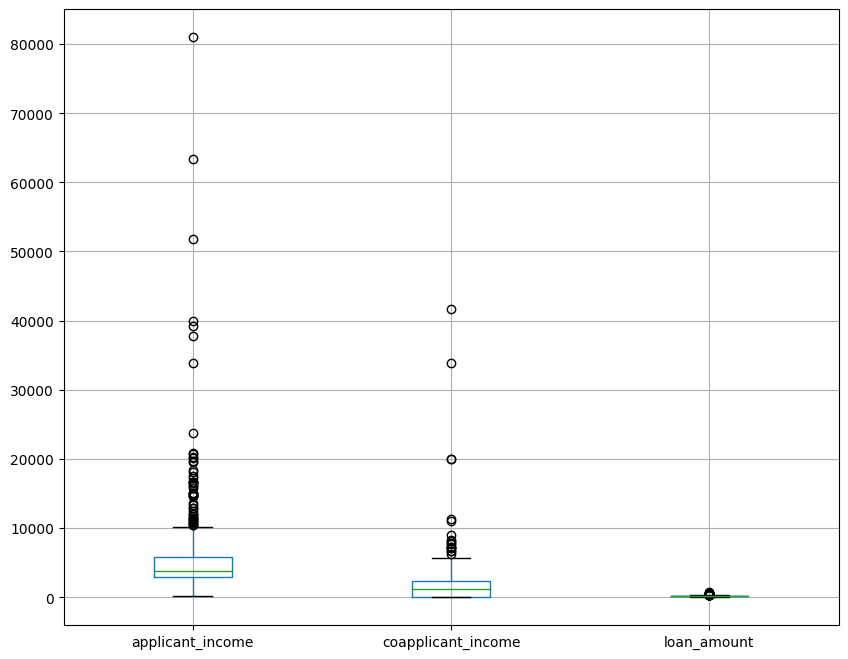

In [ ]:
#defining the figure
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['applicant_income', 'coapplicant_income', 'loan_amount']);


**Observations**
- The **applicant_income** and **coapplicant_income** have very many outliers.
- Given the small size of our dataset, removing outliers could significantly reduce the number of available data points, which might lead to biased results or a model that lacks generalizability.
- We therefore preserve these outliers

## **Data Visualisation**

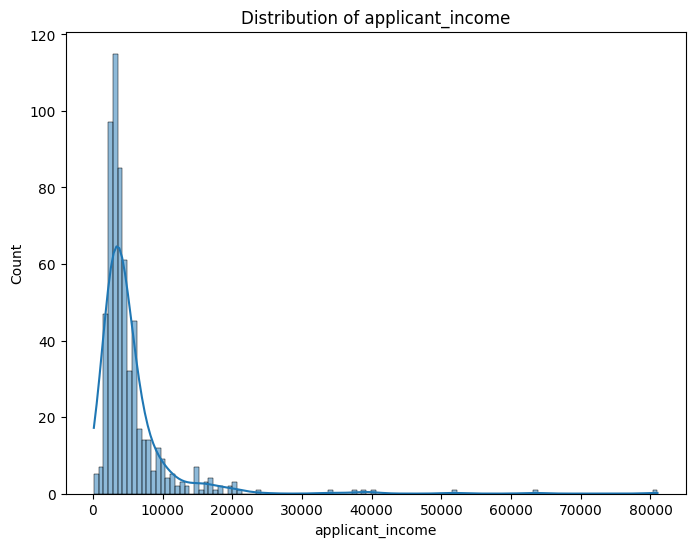

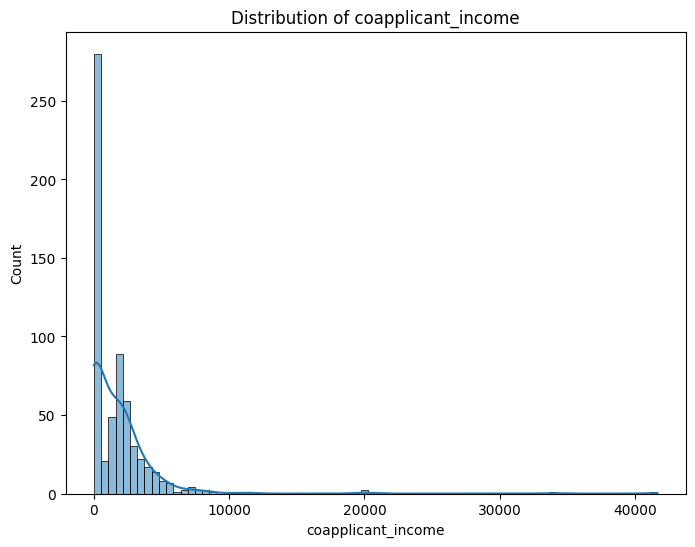

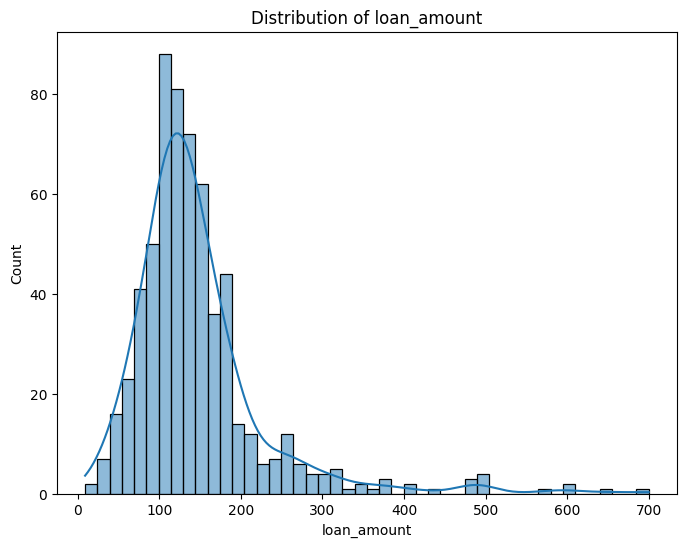

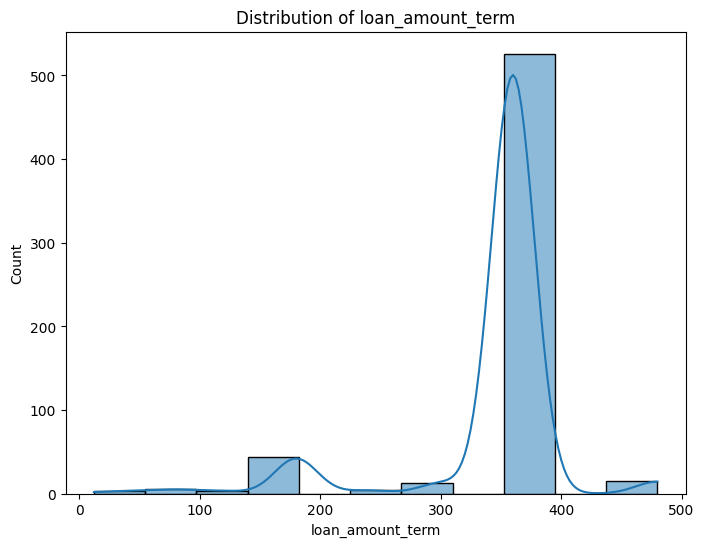

In [ ]:
#list of umerical columns
num_cols = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term']
#plotting a kdeplot
for col in num_cols:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Observations**
- **applicant_income** : The graph suggests that the majority of applicants fall into the lower income brackets, with significantly fewer applicants in the higher income brackets.
-**coapplicant_income** : majority of coapplicants fall into the lower income brackets, with significantly fewer in the higher income brackets.
- **loan_amount** :  As the loan amount increases, the number of loans decreases, majority of loans fall into the lower amount brackets
- **loan_amount_term** : majority of loans have terms around 350-400 units, with fewer loans having shorter or longer terms

Text(0.5, 1.0, 'Distribution of Loan Status by Gender')

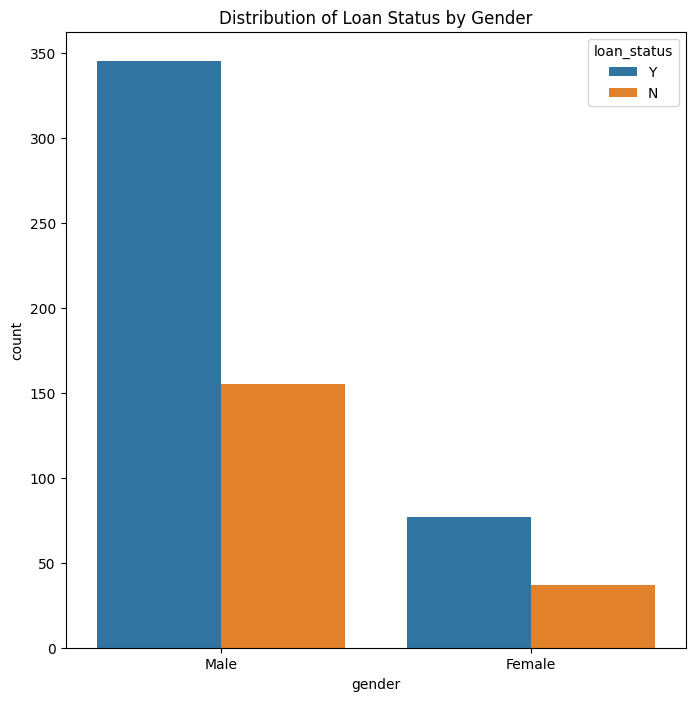

In [ ]:
#loan status by gender
fiq, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='gender', hue='loan_status', data=df);
plt.title('Distribution of Loan Status by Gender')

**Observations**
- The graph  above suggests that more males have applied for loans compared to females, and this trend is consistent across both approved and not approved loan statuses.

Text(0.5, 1.0, 'Distribution of Loan Status by Education')

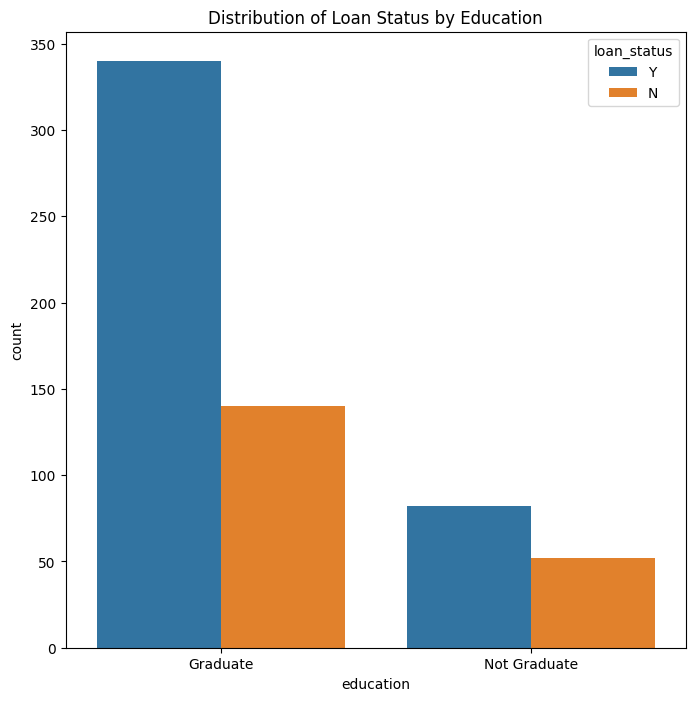

In [ ]:
#loan status be gender
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='education', hue='loan_status', data=df);
plt.title('Distribution of Loan Status by Education')

**Observations**
- The graph suggests that graduates are more likely to have their loans approved compared to non-graduates. This could be due to various factors such as higher earning potential or better creditworthiness among graduates

Text(0.5, 1.0, 'Applicant Income vs Loan Amount')

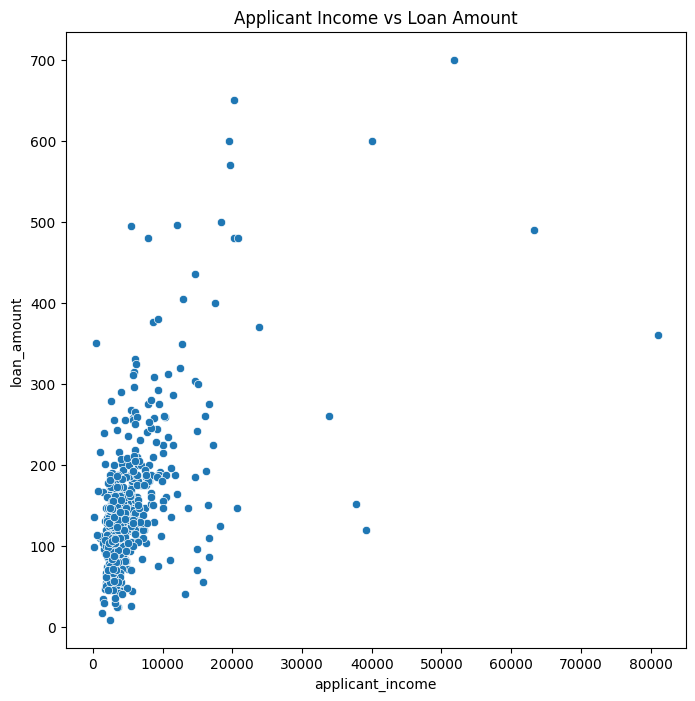

In [ ]:
#applicant income vs loan amount
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='applicant_income', y='loan_amount', data=df);
plt.title('Applicant Income vs Loan Amount')

**Observations**
- The graph suggests a positive correlation between applicant income and loan amount, meaning that as income increases, the loan amount requested also tends to increase

Text(0.5, 1.0, 'Dependants vs Loan Amount')

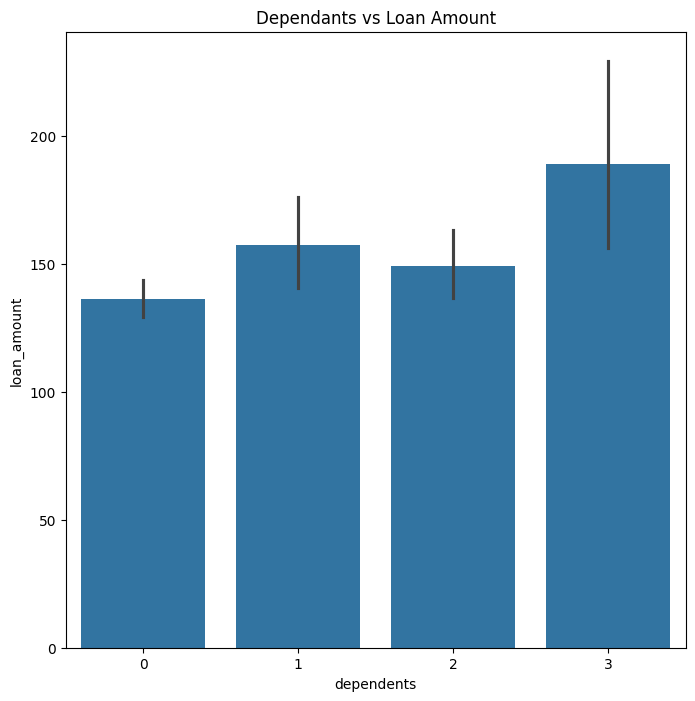

In [ ]:
#dependants vs loan amount
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='dependents', y='loan_amount', data=df);
plt.title('Dependants vs Loan Amount')

**Observations**
- Individuals with more dependents tend to receive higher loan amounts

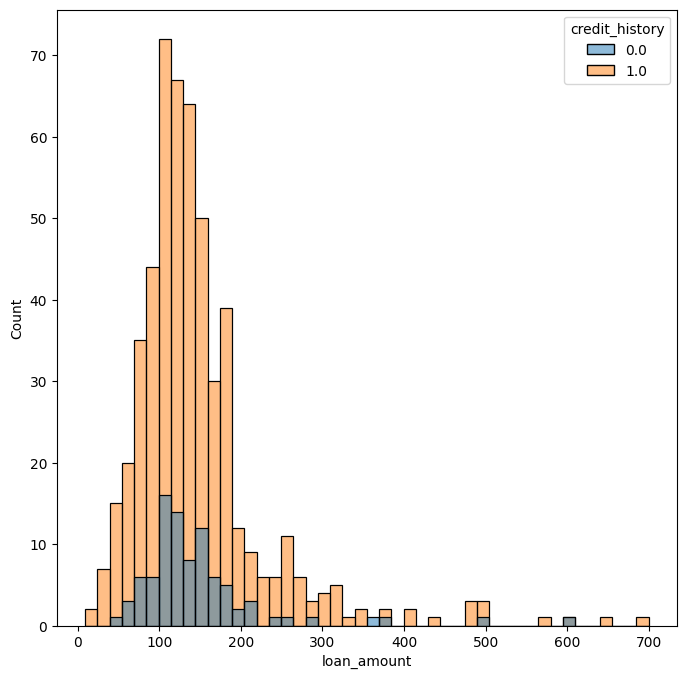

In [ ]:
#how credit score influences the amount of loan approved
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(x='loan_amount', hue='credit_history', data=df);

The graph suggests that individuals with a credit history of 1.0 are more likely to receive higher loan amounts compared to those with a credit history of 0.0.

## Data Preprocessing

- Earlier we saw that our dataset had significant outliers which we did not handle due to limited data.
- In order to begin building models we need to make sure that our data is symmetrical so that the models may generate more reliable results.
- Skewness close to 0 indicates symmetrical distribution.

In [ ]:
from scipy.stats import skew

# Calculate skewness for numerical features
numerical_features = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term']
for feature in numerical_features:
  skewness = skew(df[feature])
  print(f"Skewness of {feature}: {skewness}")

# Interpret the skewness values
# Skewness close to 0 indicates a symmetrical distribution.
# Positive skewness indicates a right-skewed distribution (tail to the right).
# Negative skewness indicates a left-skewed distribution (tail to the left).


Skewness of applicant_income: 6.523526250899361
Skewness of coapplicant_income: 7.473216996340462
Skewness of loan_amount: 2.719935540956202
Skewness of loan_amount_term: -2.396239917101247


- The skewness values indicate that our data has significant asymmetry in applicant_income, coapplicant_income and loan amounts, with most applicants being lower-income individuals and a few higher-income outliers. The loan amount term is skewed to shorter durations, reflecting a mix of longer-term loans with some shorter ones.
- To solve the skewness in these columns we will apply log transformation to normalise the distributions and improve model performance since many ML algorithms assume normality.

In [ ]:
# Data preprocessing
#log transformation of the skewed numerical columns
df['applicant_income'] = np.log1p(df['applicant_income'])# log1p is used to handle zeros
df['coapplicant_income'] = np.log1p(df['coapplicant_income'])
df['loan_amount'] = np.log1p(df['loan_amount'])

In [ ]:
for feature in numerical_features:
  skewness = skew(df[feature])
  print(f"Skewness of {feature}: {skewness}")

Skewness of applicant_income: 0.4809493580463021
Skewness of coapplicant_income: -0.17265017128703458
Skewness of loan_amount: -0.17927408542645953
Skewness of loan_amount_term: -2.396239917101247


- The columns now exhibit a normal distribution since the values are closer to 0.
- We need to convert all columns to numerical values to enable easier processing and analysis in machine learning models.Below, we convert the loan_status(Target variable) column through mapping .
- The rest of the object columns will be encoded later after splitting the data to avoid data leakage.


In [ ]:
df['loan_status'] = df['loan_status'].map({'Y': 1, 'N': 0})  # Converts 'Y' to 1 and 'N' to 0


In [ ]:
from sklearn.model_selection import train_test_split
#defining the X and y variables
X = df.drop('loan_status', axis=1)
y = df['loan_status']
#splitting the data into training and testing sets(assigning 20% to the test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# convert the xtrain and xtest to dataframes
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


In [ ]:
# #one hot encode the test data
# categorical_cols = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_area']
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


In [ ]:
X_test.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
350,Male,Yes,0,Graduate,No,9.114270,0.000000,5.433722,360.0,1.0,Semiurban
377,Male,Yes,0,Graduate,No,8.368925,0.000000,4.875197,360.0,1.0,Semiurban
163,Male,Yes,2,Graduate,No,8.335192,7.277939,5.068904,360.0,1.0,Rural
609,Female,No,0,Graduate,No,7.972811,0.000000,4.276666,360.0,1.0,Rural
132,Male,No,0,Graduate,No,7.908019,0.000000,4.262680,360.0,1.0,Semiurban


In [ ]:
X_train.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
83,Male,Yes,0,Graduate,No,8.699681,7.719130,5.583496,360.0,1.0,Semiurban
90,Male,Yes,0,Graduate,No,7.992607,7.972811,4.882802,360.0,1.0,Semiurban
227,Male,Yes,2,Graduate,No,8.740497,7.436028,5.351858,360.0,1.0,Semiurban
482,Male,Yes,0,Graduate,No,7.642044,8.055475,4.859812,360.0,1.0,Semiurban
464,Male,No,0,Graduate,No,8.334952,0.000000,4.595120,360.0,0.0,Semiurban


- By applying preprocessing steps like one-hot encoding  and scaling separately, we protect the model from data leakage, ensure consistent feature space, and maintain the integrity of the evaluation process.
-The OneHotEncoder class converts categorical columns into a format suitable for machine learning models. ie. numeric format.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define the categorical columns
categorical_columns = ['gender', 'married', 'education', 'self_employed', 'property_area']

# One-Hot Encoding for train data
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train[categorical_columns])

# Create a DataFrame from the encoded columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(categorical_columns))

# Apply OHE on the test data using the same fitted encoder (do not refit)
X_test_encoded = ohe.transform(X_test[categorical_columns])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from train and test
X_train = X_train.drop(categorical_columns, axis=1)
X_test = X_test.drop(categorical_columns, axis=1)

# Concatenate the encoded columns back to the train and test sets
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)


In [ ]:
X_train.head()

,dependents,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,gender_Female,gender_Male,married_No,married_Yes,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,0,8.699681,7.719130,5.583496,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,7.992607,7.972811,4.882802,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,8.740497,7.436028,5.351858,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,7.642044,8.055475,4.859812,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,8.334952,0.000000,4.595120,360.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_test.head()

,dependents,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,gender_Female,gender_Male,married_No,married_Yes,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,0,9.114270,0.000000,5.433722,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,8.368925,0.000000,4.875197,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,8.335192,7.277939,5.068904,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,7.972811,0.000000,4.276666,360.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,7.908019,0.000000,4.262680,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


- We scale the numerical columns to ensure that the model trains efficiently, performs optimally, and treats all features with equal importance, ultimately leading to better predictive accuracy.

In [ ]:
# Define the numerical columns
numerical_columns = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term']

# Standard Scaling for train data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])

# Apply scaling to the test data using the same scaler (do not refit)
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Create DataFrames for the scaled numerical columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_columns)

# Drop the original numerical columns from train and test
X_train = X_train.drop(numerical_columns, axis=1)
X_test = X_test.drop(numerical_columns, axis=1)

# Concatenate the scaled numerical columns back to the train and test sets
X_train = pd.concat([X_train.reset_index(drop=True), X_train_scaled_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_scaled_df.reset_index(drop=True)], axis=1)


- The target variable, loan_status is imbalanced as showen below in the initial distribution.
-Loan approvals (1): 342 cases
-Loan rejections (0): 149 cases
- This  means that the model might be biased toward predicting the majority class (loan approved), leading to inaccurate predictions for the minority class (loan rejected).
-SMOTE helps ensure that the model does not favor the majority class and performs better across both loan approvals and rejections, improving predictive performance and fairness.

In [ ]:
# Check the class distribution
print(y_train.value_counts())

# If there's a significant imbalance, apply SMOTE
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print(y_train.value_counts())

# Now you can use X_train_resampled and y_train_resampled for model training


loan_status
1    342
0    149
Name: count, dtype: int64
loan_status
0    342
1    342
Name: count, dtype: int64


## Modelling
**Metric of Evaluation** : F1score
- We use F1score since we want to maintain a balance between false loan approvals(financial risk) and false laon rejections (loosing customers).

- **True Positives (TP)**: The model correctly predicts that a loan will be approved, and the loan is actually approved.
- **True Negatives (TN)**: The model correctly predicts that a loan will be rejected, and the loan is indeed rejected.
- **False Positives (FP)**: The model predicts that a loan will be approved, but the loan is actually rejected. These are risky as they may lead to granting loans to unqualified applicants.
- **False Negatives (FN)**: The model predicts that a loan will be rejected, but the loan is actually approved. These are missed opportunities for approving loans for qualified applicants.

**Baseline Model Using Logistic Regression**

Report based on seen/trained data
              precision    recall  f1-score   support

           0       0.82      0.62      0.71       342
           1       0.69      0.87      0.77       342

    accuracy                           0.74       684
   macro avg       0.76      0.74      0.74       684
weighted avg       0.76      0.74      0.74       684

Report based on unseen data
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123



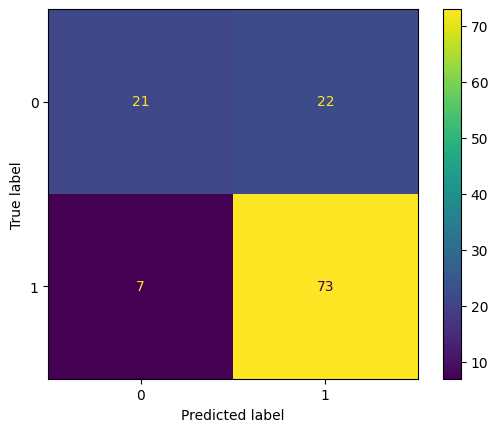

In [ ]:
#model building
#Baseline model with logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
y_hat_train1 = lr.predict(X_train)
print('Report based on seen/trained data')
print(classification_report(y_train, y_hat_train1))
print('Report based on unseen data')
print(classification_report(y_test, y_pred1))
#plotting  confusion matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.show()

**Observations**
- The model does well in identifying true approvals (73 true positives).
- There are 22 false approvals, meaning the model incorrectly predicted approvals for rejected loans.
- The false negatives (7) represent missed opportunities where loans were rejected by the model but should have been approved.

Report based on seen/trained data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       342

    accuracy                           1.00       684
   macro avg       1.00      1.00      1.00       684
weighted avg       1.00      1.00      1.00       684

Report based on unseen data
              precision    recall  f1-score   support

           0       0.72      0.42      0.53        43
           1       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123



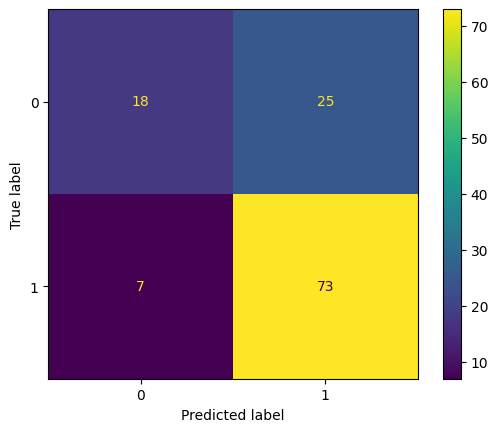

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_hat_train = rf.predict(X_train)
print('Report based on seen/trained data')
print(classification_report(y_train, y_hat_train))
print('Report based on unseen data')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()

**Key Insights:**
- **Training Data**: The model performs perfectly, indicating potential overfitting.
- **Unseen Data**: The model shows a reasonable overall accuracy (74%) but has a significant drop in performance for non-default loans. This indicates the need for further tuning
- The model correctly identifies approved loans (73 true positives) far more often than rejected loans (18 true negatives).
- However, it makes 25 false approvals, which means the model incorrectly approves loans that should have been rejected.
-The model has 7 false rejections, where it failed to approve loans that should have been approved.

Report based on seen data
              precision    recall  f1-score   support

           0       0.89      0.55      0.68       342
           1       0.67      0.94      0.78       342

    accuracy                           0.74       684
   macro avg       0.78      0.74      0.73       684
weighted avg       0.78      0.74      0.73       684

Report based on unseen data
              precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



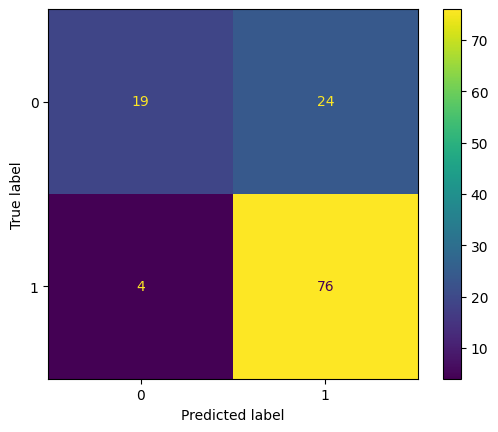

In [ ]:
#naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred4 = nb.predict(X_test)
y_hat_train4 = nb.predict(X_train)
print('Report based on seen data')
print(classification_report(y_train, y_hat_train4))
print('Report based on unseen data')
print(classification_report(y_test, y_pred4))
#plotting a classification matrix
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)
plt.show()

**Key Observations**:
- **Training Data**: The model shows a reasonable performance but has a bias towards predicting defaults.
- **Unseen Data**: The model performs slightly better on unseen data but still struggles with non-default loans
- True Positives (76) dominate, meaning the model is quite good at identifying loans that should be approved.
- There are 24 false positives, meaning the model incorrectly approved 24 loans that should have been rejected. This is significant and could pose a financial risk.
- There are only 4 false negatives, which shows that the model rarely misses loan approvals.
- True Negatives (19) are relatively fewer, indicating the model struggles more with correctly identifying loans that should be rejected.

### Hyperparameter tuning


Report based on seen data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       342

    accuracy                           1.00       684
   macro avg       1.00      1.00      1.00       684
weighted avg       1.00      1.00      1.00       684

Report based on unseen data
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



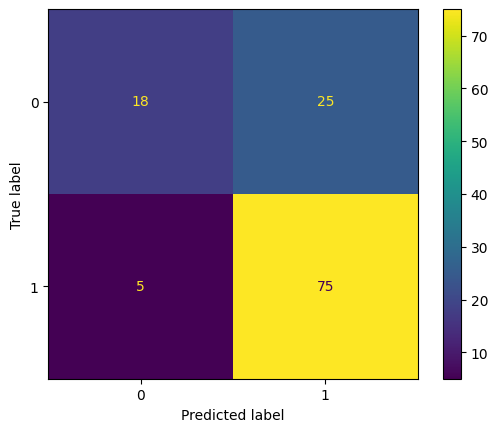

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
# Evaluate the best model on the testing data
best_model = grid_search.best_estimator_
y_hat_train2 = best_model.predict(X_train)
print('Report based on seen data')
print(classification_report(y_train, y_hat_train2))
print('Report based on unseen data')
y_pred2 = best_model.predict(X_test)
print(classification_report(y_test, y_pred2))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

**Observations**
- True Positives (TP = 75) and True Negatives (TN = 18) show that the model is fairly good at identifying both people who should and should not receive loans.

- False Positives (FP = 25) highlight that the model often over-approves loans, meaning loans are being approved for people who shouldn’t receive them, leading to potential financial risk.

- False Negatives (FN = 5) are low, indicating that only a few qualified loan applicants are being rejected, minimizing missed opportunities.

Report based on trained/seen data
              precision    recall  f1-score   support

           0       0.82      0.62      0.71       342
           1       0.70      0.87      0.77       342

    accuracy                           0.74       684
   macro avg       0.76      0.74      0.74       684
weighted avg       0.76      0.74      0.74       684

Report based on unseen data
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123



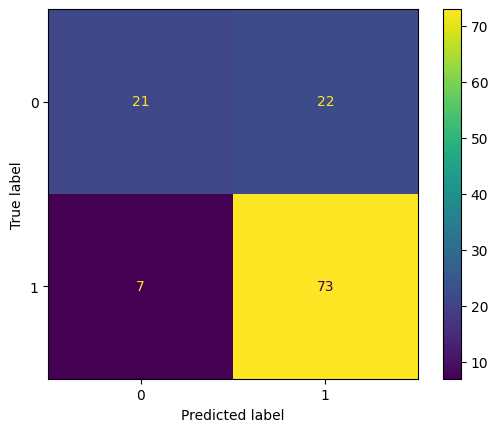

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty ('l1' for Lasso, 'l2' for Ridge)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Evaluate the best model on the testing data
best_model = grid_search.best_estimator_
y_hat_train3 = best_model.predict(X_train)
print('Report based on trained/seen data')
print(classification_report(y_train, y_hat_train3))
y_pred3 = best_model.predict(X_test)
print('Report based on unseen data')
print(classification_report(y_test, y_pred3))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

- True Positives (TP = 73) and True Negatives (TN = 21) show that the model is performing reasonably well in identifying both applicants who should and should not receive loans.

- False Positives (FP = 22) indicate that the model is mistakenly approving 22 applicants for loans who should have been denied, which could pose a financial risk.

- False Negatives (FN = 7) show that 7 qualified applicants are being incorrectly denied loans.

Best Hyperparameters:  {'var_smoothing': 1e-12}
Best Cross-Validation Accuracy:  0.7600201536595873
Report based on unseen data
              precision    recall  f1-score   support

           0       0.89      0.55      0.68       342
           1       0.67      0.94      0.78       342

    accuracy                           0.74       684
   macro avg       0.78      0.74      0.73       684
weighted avg       0.78      0.74      0.73       684

Report based on unseen data
              precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



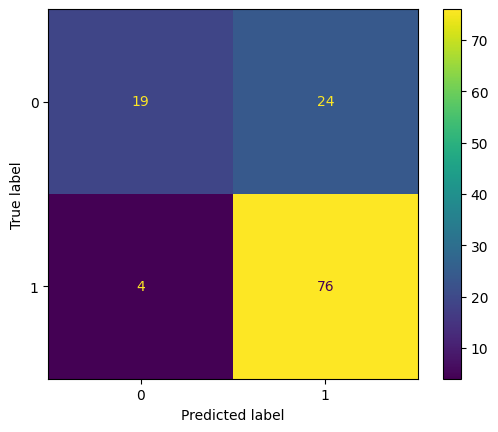

In [ ]:
# Define a parameter grid for GaussianNB (you can modify this for other Naive Bayes variants)
param_grid = {
    'var_smoothing': [1e-12, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04]  # Adjust the var_smoothing parameter
}

# Implement Grid Search CV for hyperparameter tuning
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='f1')

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters and accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: ", grid_search.best_score_)

# Predict using the best model
y_pred5 = grid_search.best_estimator_.predict(X_test)
y_hat_train5 = grid_search.best_estimator_.predict(X_train)
print('Report based on unseen data')
print(classification_report(y_train, y_hat_train5))
print('Report based on unseen data')
print(classification_report(y_test, y_pred5))
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test)
plt.show()

- The hypertuned Gaussian naive Bayes shows no significant improvement from the previos gaussianNB model.
- True Negatives (TN): 19 loans were correctly predicted as not defaulting.
- False Positives (FP): 24 loans were incorrectly predicted as defaulting when they did not.
- False Negatives (FN): 4 loans were incorrectly predicted as not defaulting when they actually did.
- True Positives (TP): 76 loans were correctly predicted as defaulting.


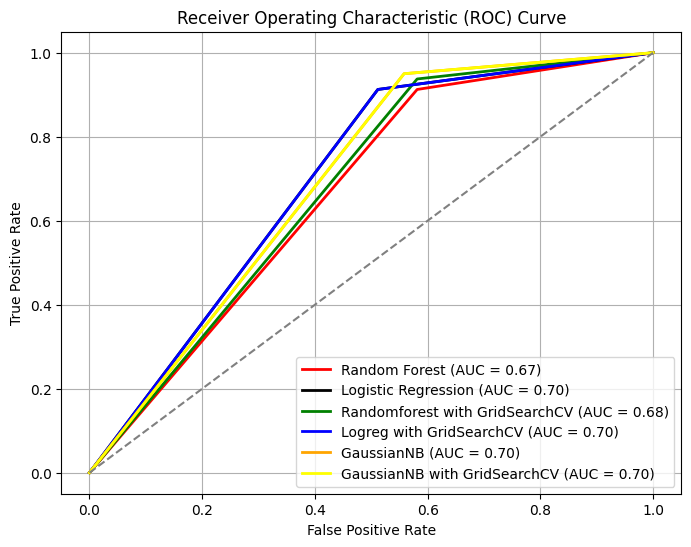

In [ ]:
# Calculate ROC curve for each model
fpr1, tpr1, thresholds= roc_curve(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr2, tpr2, thresholds= roc_curve(y_test, y_pred2) #gridsearchlr
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred3)
# fpr4, tpr4, _ = roc_curve(y_test, y_pred_rand)
fpr4, tpr4, _ = roc_curve(y_test, y_pred4)
fpr5, tpr5, _ = roc_curve(y_test, y_pred5)

# Calculate AUC for each model
auc = roc_auc_score(y_test, y_pred)
auc1 = roc_auc_score(y_test, y_pred1)
auc2 = roc_auc_score(y_test, y_pred2)
auc3 = roc_auc_score(y_test, y_pred3)
# auc4 = roc_auc_score(y_test, y_pred_rand)
auc4 = roc_auc_score(y_test, y_pred4)
auc5 = roc_auc_score(y_test, y_pred5)

# Calculate ROC curve for each model

# Calculate AUC for each model

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'Random Forest (AUC = {auc:.2f})')
# Plot Logisticregression ROC curve
plt.plot(fpr1, tpr1, color='black', lw=2, label=f'Logistic Regression (AUC = {auc1:.2f})')
# Plot Best Model ROC curve
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Randomforest with GridSearchCV (AUC = {auc2:.2f})')
# Plot DecisionTreeClassifier ROC curve
plt.plot(fpr3, tpr3, color='blue', lw=2, label=f'Logreg with GridSearchCV (AUC = {auc3:.2f})')
# Plot RandomForestClassifier ROC curve
plt.plot(fpr4, tpr4, color='orange', lw=2, label=f'GaussianNB (AUC = {auc4:.2f})')
# Plot GaussianNB with GridSearchCV ROC curve
plt.plot(fpr5, tpr5, color='yellow', lw=2, label=f'GaussianNB with GridSearchCV (AUC = {auc5:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Observtions**
- Logistic Regression, Logreg with GridSearchCV, and GaussianNB with GridSearchCV all have the highest AUC scores of 0.70, suggesting they are the most effective at distinguishing between loan defaults and non-defaults.

### Model Selection

- Although several models show good performance and have the same AUC, we settle on Gaussian Naive Bayes. This is because it exhibits a smaller margin between the training and test data with respect to the F1 score.

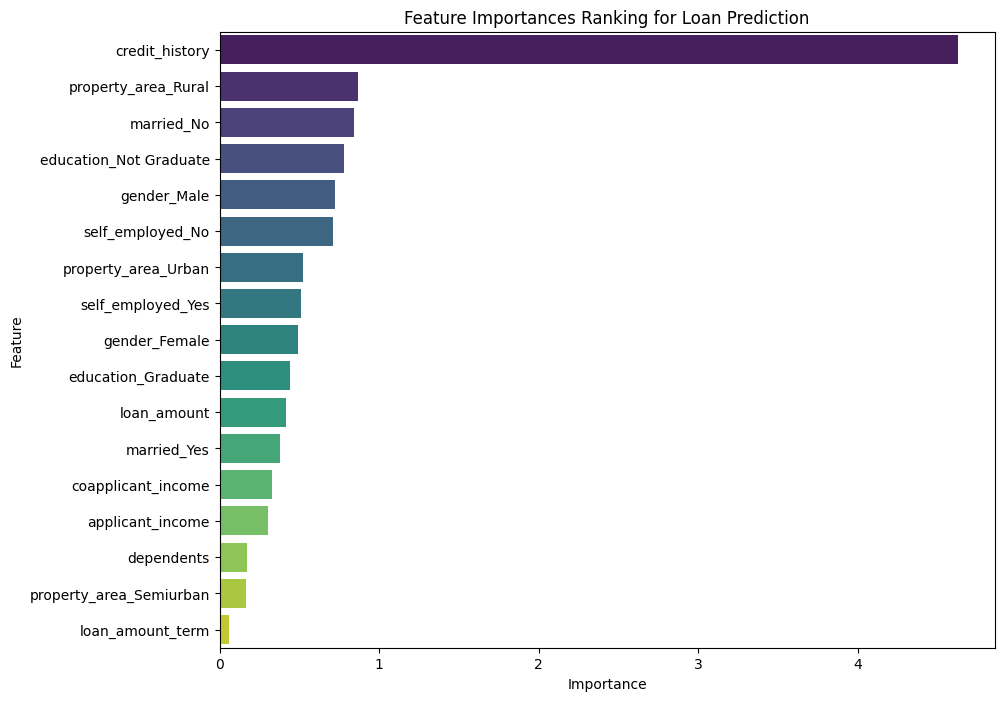

In [ ]:
coefficients = best_model.coef_[0]
features = X_train.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Absolute value of coefficients to understand the magnitude of importance
importance_df['Importance'] = importance_df['Coefficient'].abs()

# Sort by the importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot the feature importances using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Importance')
plt.title('Feature Importances Ranking for Loan Prediction')
plt.show()

- Top Features: The most important features are related to credit history, property area, and marital status, indicating that these factors are crucial in predicting loan approval.
- Income and Employment: Both applicant and coapplicant incomes, along with employment status, are significant, suggesting that financial stability and employment type might influence loan approval.
- Demographic Factors: Marital status, education level, and gender also play important roles, highlighting the influence of demographic factors on the predictions.

## Conslusion
- After evaluating several models for loan prediction, we have chosen Gaussian Naive Bayes as the best performing model. This decision is based on its consistent performance across both training and test datasets, particularly with respect to the F1 score. The model demonstrates a smaller margin between training and test data, indicating better generalization and reliability.

##Recommendations


1.   Integrate More Features: While the current model performed well, adding more features such as credit score, employment type, or industry information may improve prediction accuracy.
2.   Use the Naive Bayes Model in Production: Given its strong performance in terms of F1 score and computational efficiency.
1.   Monitor Model Performance Over Time: Regular monitoring and periodic retraining of the model should be conducted as more data becomes available

##Limitations


1.   Small Dataset: The dataset used may have limited the model's ability to generalize well. A larger dataset with more samples would help improve the robustness of the model and prevent potential overfitting or underfitting.
2.   Simplicity of the Model: While Naive Bayes was the best-performing model, its simplicity may limit its performance on more complex datasets.

1.   Imbalanced Data: Although SMOTE was used to handle class imbalance, there are inherent risks in synthetic oversampling, such as the possibility of introducing noise. Also, if the original data remains highly imbalanced in the future, the model’s performance could degrade unless retraining and class-balancing techniques are continuously applied.








